# <p style="text-align: center;"> Practical Quantum Computing with Cirq </p> 
<p style="text-align: center;"> Ryan LaRose </p>
<p style="text-align: center;"> Department of Computational Mathematics, Science, and Engineering, Michigan State University </p>
<p style="text-align: center;"> Department of Physics and Astronomy, Michigan State University </p>

### <p style="text-align: center;"> Abstract </p> 
<p style="text-align: justify;"> In July 2018, the <a href="https://quantumcomputingreport.com">Quantum Computing Report</a> published an <a href="https://quantumcomputingreport.com/wp-content/uploads/2018/06/Overview-and-Comparison-of-Gate-Level-Quantum-Software-Platforms-Final-June-21-2018.pdf">in-depth analysis of four major gate-model quantum software platforms</a>: pyQuil by Rigetti, QISKit by IBM, ProjectQ by ETH Zurich, and the Quantum Developer Kit by Microsoft. Shortly after, Google announced the release of their own quantum software platform: Cirq. In this paper, we provide an overview and comparative analysis of this newly-released software in reference to the previously-reviewed quantum software platforms. Our analysis proceeds similarly by covering language syntax through example programs, library support, quantum simulators, and quantum computer capabilities. We additionally cover more advanced features of the software including the strong support for variational quantum algorithms and near-term quantum computing. </p> 

# <p style="text-align: center;">I. Introduction </p> 

<p style="text-align: justify;"> 
Quantum computing is transitioning from a theoretical to practical phase. Historically, researchers have asked questions about the possibilities of speedups through black-box access to abstract, idealized quantum computers. Recently, small, imperfect quantum computers have been fabricated and made available over the cloud. A significant body of literature is emerging as researchers use these devices to solve problems in nuclear physics [Nuc Phys Paper], quantum chemistry [VQE], condensed matter [VQSD], optimization [QAOA], number theory [VQF], graph theory [QAOA on MAXCUT], and even quantum computing itself [QAQC et al.]. While these problems are small and easily handled by conventional computers, the prospect of large-scale quantum computers could quickly change this. Even on current quantum computers, certain contrived problems may soon demonstrate "quantum supremacy" [Quant Suprem Paper], an exciting landmark in the history of computation. 
</p>

<p style="text-align: justify;"> 
This theoretical-to-practical progression of the field necessitates access to quantum computers that is much different from black box access on pen and paper. Many institutions in industry and academia have recognized this and began building tools for this purpose, and a slew of startup companies has emerged to fill the gaps in the transition to practical quantum computing. The following diagram represents a snapshot of this rapidly evolving landscape:
</p>

<img src="qchart.jpg" >
<p style="text-align: center;">Schematic diagram representing quantum computing companies and their position in the quantum software stack. "Full-stack providers" focus on all areas of the stack whereas "target providers" focus on particular areas. Because companies that do algorithms/applications frequently do software as well, we have binned these two categories together on the right. (Similarly for hardware/compiling and control.)</p>


<p style="text-align: justify;"> 
For most "full-stack" quantum computing companies, access to quantum computers is granted over the cloud, and the interaction between research scientists and quantum computers is mediated by a software platform with API access. To an outside observer, this interaction does not warrant much thought: it just needs to allow users to implement quantum gates on qubits. However, many practical considerations emerge when using a software interface to communicate with a real or simulated quantum computer. Among these are the following:
</p>

1. What gate operations are natively built-in?
1. Can a gate that's not native be implemented into a quantum algorithm? How difficult is it to do this?
1. How many quantum computers does the platform give access to?
1. Is compilation handled automatically by the software? And to what degree of optimality?
1. How do job requests to quantum computers get handled? In a queue, dedicated time?
1. What quantum computer simulators can be used to test algorithms? How many qubits can be simulated? Is the simulator noisy or noiseless?
1. Does every quantum algorithm have to be programmed manually? Or are some common subroutines built-in?
1. What _classical_ programming language is the software written in?
1. How easy is it to create, work with, and manipulate quantum circuits?
1. How easy is it to parametrize algorithms for near-term quantum computing?

<p style="text-align: justify;"> 
Each of these considerations is important from a practical perspective. For example, an algorithm on many qubits may be better implemented on a software platform with a more high-performance simulator; an algorithm with many gates may be better for a platform with higher fidelity qubits; an algorithm with many non-standard gates may be better for a platform with an optimal compiler. Other considerations such as examples, tutorials, and documentation are equally important as they help bring in new users and answer questions of experienced users.
</p>

<p style="text-align: justify;"> 
For these reasons, it is both valid and important to evaluate quantum software platforms as more than the simple interface they may appear to be. To this end, the Quantum Computing Report published an article comparing Forest by Rigetti, QISKit by IBM, ProjectQ by ETH Zurich, and the Quantum Developer Kit by Microsoft. Each platform was found to have different strengths and different emphases that determined the set of problems best-suited for the environment. The purpose of this article is to introduce and analyze Cirq in a similar fashion.
</p>

<p style="text-align: justify;"> 
To this end, the rest of the article is organized as follows. After briefly commenting on the format of this article, we cover installation, documentation, language syntax, and quantum computer/simulator support in Cirq. We then transition into more advanced features like circuit manipulation and optimization. Lastly, we conclude with an example of a variational quantum algorithm to demonstrate the near-term capabilities of Cirq. Throughout, we refer back to previously covered software platforms to maintain the comparative analysis in our previous installation.
</p>

## <p style="text-align: center;"> A. Format of the Article </p> 

<p style="text-align: justify;"> 
This article was written as a Jupyter Notebook and exported as an HTML file. The HTML file is hosted on the [Quantum Computing Report website](https://quantumcomputingreport.com) and the Jupyter notebook is hosted on [GitHub](https://github.com/rmlarose). In the HTML version, all code and all outputs are visible in the article, but the code is not able to run. To interactively run the code while reading through the article, see the Jupyter Notebook version. In order to run the code, a working installation of Cirq is required (see _Installation_ below). The Cirq code in the notebook version will be kept up-to-date with future versions/releases of Cirq. The article also assumes basic familarity with quantum computing, for which many good [resources](https://quantumcomputingreport.com/resources/education/) now exist.
</p>

# <p style="text-align: center;"> II. The Basics of Cirq </p> 

<table style="width:100%">
  <tr>
    <th>Institution</th>
    <!--<th>First Release</th>-->
    <th>Version</th>
    <!--<th>Open Source?</th>-->
    <!--<th>License</th>-->
    <!--<th>Homepage</th>-->
    <th>GitHub</th>
    <th>Documentation</th>
    <th>OS</th>
    <th>Requirements</th>
    <th>Classical Language</th>
    <th>Quantum Language</th>
    <th>Quantum Hardware</th>
    <th>Simulator</th>
    <!--<th>Features</th>-->
  </tr>
  <tr>
    <td><a href="https://ai.google/research/teams/applied-science/quantum-ai/">Google Quantum AI</a></td>
    <td>v0.4.0</td> 
    <td><a href="https://github.com/quantumlib/Cirq">Git</a></td>
    <td><a href="https://cirq.readthedocs.io/en/latest/">Docs</a></td>
      <td>Mac, Windows, Linux</td>
      <td><a href="https://www.python.org/downloads/">Python</a> 3.5 or greater (else Python 2.7)</td> 
      <td>Python</td>
      <td>----</td>
      <td>Foxtail (22 qubits), Bristlecone (78 qubits)</td>
      <td>~20-30 qubits</td>
  </tr>
</table>

<p style="text-align: justify;"> 
Cirq is an open-source Python framework for "creating, editing, and invoking Noisy Intermediate-Scale Quantum (NISQ) circuits." The first version of the software was publicly released in August 2018; the code is still in alpha testing and under development. As such, some features or code included in this article may need modifications for future versions of Cirq. This article should be considered a review for the version of Cirq at the time of writing, which is listed in the table below. (Note that the Jupyter Notebook version of this article, hosted online at [GitHub](https://github.com/rmlarose), will be kept up to date for future versions of Cirq.)
</p>

<img src="cirq-overview.png" width=500>
<p style="text-align: center;">The components of Cirq. When installed onto a computer, Cirq provides a library for working with quantum circuits and a high-performance local quantum circuit simulator. As of December 2018, connection to hardware devices or the "Quantum Engine"/"Quantum Cloud Services" is unavailable to general users, but this is expected to change in the future.</p>

## <p style="text-align: center;"> A. Installation </p> 

The easiest way to install `Cirq` is by using pip via

```
pip install cirq
```

at a command line. Without leaving the notebook, executing the cell below will try to install Cirq on the users computer. Alternatively, the source code for Cirq can be obtained from <a href="https://github.com/quantumlib/Cirq">https://github.com/quantumlib/Cirq</a>. For complete installation instructions on multiple platforms, see the documentation at <a href="https://cirq.readthedocs.io/en/latest/install.html">https://cirq.readthedocs.io/en/latest/install.html</a>. Readers who simply wish to read the article without using Cirq can ignore this step.

In [1]:
"""Attempts to pip install Cirq without leaving the notebook."""
#!pip install --upgrade pip
#!pip install cirq

'Attempts to pip install Cirq without leaving the notebook.'

## <p style="text-align: center;"> B. Documentation and Tutorials </p> 

<p style="text-align: justify;"> 
The <a href="https://cirq.readthedocs.io/en/latest/install.html">documentation for Cirq</a> contains instructions on installation for all three major operatings systems, an in-depth tutorial for the variational quantum eigensolver, and details on three major components of the Cirq library: circuits, gates, and simulation. In addition, the section on _Schedules and Devices_ details how Cirq can be used with specific quantum hardware and reflects the emphasis on near-term quantum computing. The documentation also contains a detailed API reference for the entire library and development guidelines for those who may want to contribute to the source code.
</p>

## <p style="text-align: center;"> C. Language Syntax </p> 

<p style="text-align: justify;"> 
As in our previous coverage of quantum software platforms, we include example programs to demonstrate the language syntax. Below, we implement the "quantum random bit generator" algorithm. To use the functionality of Cirq, we first import the library (and additional libraries we'll use throughout the article).
</p>

In [10]:
"""All imports for the article."""
import cirq

import numpy as np
%matplotlib inline

In what follows we create a circuit and instantiate it with the operations for the algorithm (Hadamard and measure).

In [11]:
"""Create a random number generator circuit using Cirq."""
# get a qubit register
qbits = [cirq.LineQubit(0)]

# get a quantum circuit
circ = cirq.Circuit()

# add the instructions to the circuit
circ.append([cirq.H(qbits[0]), cirq.measure(qbits[0], key="z")])

<p style="text-align: justify;"> 
Note that Cirq defines qubits to be `LineQubit`s or `GridQubit`s, since these are common constructions in NISQ computers. The former is indexed by one integer, as we have done in Line 4 above, and the latter by two (x, y coordinates). Qubits are commonly defined in lists (or generally iterables) for easy indexing in algorithms. In Line 7 above we instantiate a circuit, and in Line 10 we append the instructions for the algorithm. (There are multiple ways to add instructions to an algorithm in Cirq. For most of this article, we'll stick to the above method for simplicity.)
</p>

<p style="text-align: justify;"> 
The Cirq library provides text diagram representation of quantum circuits, which can be visualized by printing out the circuit:
</p>

In [12]:
"""Print out the random number generator circuit."""
print(circ)

0: ───H───M('z')───


<p style="text-align: justify;"> 
While these diagrams are not of publication quality like those that can be made in ProjectQ or even QISKit, they are a useful tool for verifying correctness of quantum circuits and debugging. Note that measurements are made with a `key` to easily access the results of running the circuit, as we will see below.
</p>

## <p style="text-align: center;"> D. Quantum Computers </p> 

Cirq does not currently provide cloud access to it's quantum computers for general users. Indeed, as per the documentation in <a href="https://github.com/quantumlib/Cirq/blob/master/cirq/google/engine/engine.py">Cirq's engine class</a>:

<blockquote cite="">
In order to run on[e] must have access to the Quantum Engine API. Access to this
API is (as of June 22, 2018) restricted to invitation only.
</blockquote>


Nonetheless, it is known that Google has quantum computers that have been stated to be made available via Cirq in the near future. Cirq already provides details on these devices. For instance, the architecture of the 22-qubit FoxTail computer can be printed out in Cirq by doing:

In [13]:
"""Print out the architecture of the FoxTail quantum computer."""
print("FoxTail has {} qubits arranged in the following topology:\n".format(len(cirq.google.Foxtail.qubits)))
print(cirq.google.Foxtail)

FoxTail has 22 qubits arranged in the following topology:

(0, 0)───(0, 1)───(0, 2)───(0, 3)───(0, 4)───(0, 5)───(0, 6)───(0, 7)───(0, 8)───(0, 9)───(0, 10)
│        │        │        │        │        │        │        │        │        │        │
│        │        │        │        │        │        │        │        │        │        │
(1, 0)───(1, 1)───(1, 2)───(1, 3)───(1, 4)───(1, 5)───(1, 6)───(1, 7)───(1, 8)───(1, 9)───(1, 10)


The 72-qubit Bristlecone computer, with which quantum supremacy may be demonstrated on, can be displayed similarly:

In [14]:
"""Print out the architecture of the Bristlecone quantum computer."""
print("Bristlecone has {} qubits arranged in the following topology:\n".format(len(cirq.google.Bristlecone.qubits)))
print(cirq.google.Bristlecone)

Bristlecone has 72 qubits arranged in the following topology:

                                             (0, 5)────(0, 6)
                                             │         │
                                             │         │
                                    (1, 4)───(1, 5)────(1, 6)────(1, 7)
                                    │        │         │         │
                                    │        │         │         │
                           (2, 3)───(2, 4)───(2, 5)────(2, 6)────(2, 7)───(2, 8)
                           │        │        │         │         │        │
                           │        │        │         │         │        │
                  (3, 2)───(3, 3)───(3, 4)───(3, 5)────(3, 6)────(3, 7)───(3, 8)───(3, 9)
                  │        │        │        │         │         │        │        │
                  │        │        │        │         │         │        │        │
         (4, 1)───(4, 2)───(4, 3)───(4, 4)───(4, 5)────(4, 6)─

It should be noted that Cirq provides built-in functionality to convert it's circuits to OpenQASM code:

In [15]:
"""Generate and print out the OpenQASM code for the random number generator circuit."""
print(circ.to_qasm())

// Generated from Cirq v0.4.0

OPENQASM 2.0;
include "qelib1.inc";


// Qubits: [0]
qreg q[1];
creg m_z[1];


h q[0];
measure q[0] -> m_z[0];



This functionality makes it very simple to run algorithms generated in Cirq on IBM's quantum computers. (For instance, by navigating to the <a href="https://quantumexperience.ng.bluemix.net/qx/qasm">IBM Q Experience website</a> and using the online QASM editor. See the Figure below.)

<img src="qasm-screenshot.png" width=900>
<p style="text-align: center;">Screenshot from the IBM Q Experience online QASM Editor using Cirq to generate QASM code. The code input into the editor is the same code obtained above by executing `circ.to_qasm()`. By selecting "run" or "simulate" on the IBM Q Experience website, one can execute the quantum algorithm on a real or simulated quantum computer, respectively.</p>

## <p style="text-align: center;"> E. Quantum Simulators </p> 

Although access to Google's quantum computers is currently restricted, Cirq provides a quantum computer simulator, the `XmonSimulator`, to locally execute quantum algorithms. To do so with the random bit generator circuit above, we can do the following:

In [16]:
"""Run the random number generator on the XmonSimulator."""
# get a simulator
simulator = cirq.google.XmonSimulator()

# run the circuit
out = simulator.run(circ, repetitions=50)

# get the results and display them
results = out.histogram(key="z")
print(results)

Counter({1: 27, 0: 23})


The output is returned as a `Counter` object (Python built-in in the `collections` library) that displays key-value pairs corresponding to the output and number of times that output was recored. Cirq also provides the function `plot_state_histogram` to visualize the output distribution:

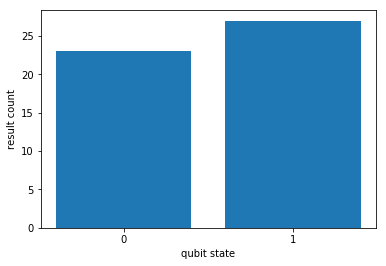

counts = [23. 27.]


In [17]:
"""Display the output distribution of a cirq.TrialResult."""
counts = cirq.plot_state_histogram(out)
print("counts =", counts)

For such a simple quantum algorithm, any quantum computer simulator is essentially equivalent. However, as algorithms scale to larger numbers of qubits and larger numbers of gates, runtime of the simulator can become important. The best current methods for classically simulating quantum circuits peak at around 50 qubits due to memory requirements. For a fixed number of qubits, better simulators can simulate circuits with lower overall runtime, a desirable feature for many applications. 

Below we test the performance of Cirq's `XmonSimulator` along these lines. Additionally, we discuss other important capabilities of quantum computer simulators such as noise modeling.

### <p style="text-align: center;"> 1. Performance of the `XmonSimulator` </p> 

Here we test the performance of Cirq's `XmonSimulator` using random quantum circuits with different numbers of qubits and total depth. The particular form of the circuit we will consider consists of random single qubit rotations on all qubits, then a layer of entangling CNOT gates with one qubit randomly selected as the control. We define the layer of single qubit rotations plus the layer of entangling CNOTs to have a depth of one. A schematic circuit diagram for this is shown below:

The code for testing the simulator is contained in a separate Python file called `sim_test.py`. Within this file is a function, also called `sim_test`, which inputs the number of qubits, depth of the circuit, and number of times to run the circuit (also called _shots_ or _repetitions_). This function creates a random circuit of the form described above, runs it for the desired number of times, then returns the wall clock time for how long it took. An example of using this function is shown in the code cell below.

In [17]:
"""Simulator performance test for small circuit. Note circuit structure will be random."""
# import the simulator test function
from sim_test import sim_test

# inputs to sim_test
nqubits = 4         # number of qubits
depth = 1           # depth of circuit
nreps = 1           # number of repetitions
verbose=True        # verbose output (prints circuit)

# do the timing test
time = sim_test(nqubits, depth, nreps, verbose=verbose)

# display the output
print("It took %0.2f seconds to run the above circuit." % time)

Circuit structure shown below:
0: ───Rx(0.525π)───Ry(0.906π)───Rz(1.189π)───@───@───@───M───
                                             │   │   │
1: ───Rx(1.265π)───Ry(0.469π)───Rz(1.411π)───X───┼───┼───M───
                                                 │   │
2: ───Rx(1.327π)───Ry(1.772π)───Rz(1.213π)───────X───┼───M───
                                                     │
3: ───Rx(1.022π)───Ry(0.101π)───Rz(0.81π)────────────X───M───
It took 0.03 seconds to run the above circuit.


For such a small circuit, the runtime is almost instantenous. As we scale to larger and larger circuits, however, the complexity of simulating the circuit increases. Below we up the scale to 20 qubits with a depth of 10.

In [ ]:
"""Simulator performance test for larger circuit."""
# inputs to sim_test
nqubits = 20        # number of qubits
depth = 10          # depth of circuit
nreps = 1           # number of repetitions
verbose=False       # verbose output (prints circuit)

# do the timing test
time = sim_test(nqubits, depth, nreps, verbose=verbose)

# display the output
print("It took %0.2f seconds to run the above circuit." % time)

Here the code takes noticably longer to run. Using this `sim_test` function, we test the `XmonSimulator` using $n = 10, 12, ..., 30$ qubits with depths of $d = 10, 20, ..., 50$ layers. The results of this study are displayed in the figure below.

This plot shows time as a function of qubits $n$ and depth $d$. For each $(n, d)$ value, we simulated the circuit fifty times and averaged the total runtime. 

### <p style="text-align: center;"> 2. Features of the `XmonSimulator` </p> 

# <p style="text-align: center;"> III. Manipulating Circuits </p> 

Cirq provides many tools for working with and manipulating quantum ciruicts. By "manipulating quantum circuits," we mean operations of the following form:

* Creating quantum circuits.
* Inserting instructions in a circuit.
* Removing instructions from a circuit.
* Simplifying a circuit.

In [ ]:

# one qubit operations dictionary
oneq_ops = {1 : cirq.X,
            2 : cirq.Y,
            3 : cirq.Z,
            4 : cirq.H,
            5 : cirq.X ** 0.5,
            6 : cirq.T}

# two qubit operations dictionary

def random_circuit(num_qubits, depth, 
                   oneq_ops_dict=oneq_ops):
    # get some qubits and a circuit
    qbits = [cirq.LineQubit(x) for x in range(num_qubits)]
    circ = cirq.Circuit()
    
    for _ in range(depth):
        op_keys = np.random.randint(1, len(oneq_ops) + 1, num_qubits)
        circ.append(
            [oneq_ops[key](q) for (q, key) in enumerate(op_keys)],
            strategy=cirq.InsertStrategy.EARLIEST
            )
        
    return circ

In [ ]:
circ = random_circuit(4, 8)

In [ ]:
print(circ)

In [ ]:
opt = cirq.OptimizationPass()

In [ ]:
opt.optimize_circuit(circ)

In [ ]:
print(circ)

Let's first look at `LineQubit`'s and how to declare them.

In [ ]:
# get a list of qubits with linear indices
line_qubits = [cirq.LineQubit(k) for k in range(16)]

The class ```LineQubit``` allows the user to get the index of the qubit with the instance ```LineQubit.x``` as shown below.

In [ ]:
print(line_qubits[4].x)

## Creating Circuits

We can actually create circuits in Cirq without any reference to qubits. For example, we can create a circuit by writing:

In [ ]:
# generic circuit
circ = cirq.Circuit()

This gives us a `Circuit` object. Right now, there are no qubits associated with our circuit:

In [ ]:
print(circ.all_qubits())

Qubits get added to our circuit dynamically as we add operations. An __operation__ in Cirq is "an effect on a collection of qubits." For example, "do the Hadamard gate on _this qubit_" in an example of an operation:

In [ ]:
# create the operation of hadamard on line_qubits[0]
operation = cirq.ops.H(line_qubits[0])

# print out the operation and its type
print(operation)
print(type(operation))

The output "H(0)" is Cirq's language of describing what the operation does: a Hadamard gate on the qubit indexed by 0. The `type` of our operation is a `GateOperation`, the most common type of operation in Cirq.

Now that we have an operation, we can add it to our circuit. There are many ways of doing this in `Cirq`. For now, we'll use the `append()` method.

In [ ]:
# add the operation to the circuit
circ.append(operation)

After doing so, we can verify that our circuit now has qubits associated with it.

In [ ]:
# print out all the qubits in the circuit
print(circ.all_qubits())

We can even access all of the operations in the circuit using the `all_operations()` method. Note that this method returns a generator object in Python.

In [ ]:
# print out all the operations in the circuit
print([op for op in circ.all_operations()])

Cirq even provides a built-in ASCII circuit drawer to visualize the circuit diagram, which is useful to do in many situations.

In [ ]:
# print out an ASCII drawing of the circuit diagram
print(circ)

To add more operations to our circuit, we can use the append method again:

In [ ]:
# add a measurement
circ.append(cirq.ops.measure(line_qubits[0], key="z"))

When we print out the circuit now, we see:

In [ ]:
print(circ)

This is now the well-known random bit generator circuit.

## Working with Circuits

### Methods Returning Circuit Information

There are many methods that return some information about the circuit. These include:

1. ```next_moment_operating_on(qubits)```
    * Finds the index of the next moment that touches the given qubits.
    
1. ```prev_moment_operationg_on(qubits)```
    * Finds the index of the previous **(says "next" in code docs --> typo!)** moment that touches the given qubits.
    
1. ```operation_at(qubit, moment_index)```
    * Finds the operation on a qubit within a moment indexed by ```moment_index```, if any.
    
1. ```all_qubits()```
    * Returns the qubits acted upon by operations in this circuit.
    
1. ```findall_operations(predicate)```
    * Find the locations of all operations that satisfy a given condition. Returns an iterator of (index, operation) tuples where each operation satisfies the ```predicate```.
    
1. ```to_unitary_matrix()```
    * Converts the circuit into a unitary matrix, if possible.

1. ```apply_unitary_effect_to_state()```
    * Left-multiplies a state vector by the circuit's unitary effect.
    
1. ```to_text_diagram()```
    * Returns text containing a diagram describing the circuit.
    
1. ```to_text_diagram_drawer()``` **(maybe omit)**
    * Returns a TextDiagramDrawer with the circuit drawn into it.

In the above, we have given a brief description of these functions and omitted most optional arguments. For complete information on these functions, please see the documentation or source code.

### Methods for Manipulating Circuits

The functions we included above are useful for getting circuit information, but they don't affect the circuit. Cirq contains many useful built-in functions for manipulating, or mutating, quantum circuits. We'll now look at these through a series of examples.

First we'll write a function for giving us a (random) circuit to work with.

In [ ]:
import numpy as np

# one qubit operations dictionary
oneq_ops = {1 : cirq.X,
            2 : cirq.Y,
            3 : cirq.Z,
            4 : cirq.H,
            5 : cirq.X ** 0.5,
            6 : cirq.T}

# two qubit operations dictionary

def random_circuit(num_qubits, depth, 
                   oneq_ops_dict=oneq_ops):
    # get some qubits and a circuit
    qbits = [cirq.LineQubit(x) for x in range(num_qubits)]
    circ = cirq.Circuit()
    
    for _ in range(depth):
        op_keys = np.random.randint(1, len(oneq_ops) + 1, num_qubits)
        circ.append(
            [oneq_ops[key](q) for (q, key) in enumerate(op_keys)],
            strategy=cirq.InsertStrategy.EARLIEST
            )
        
    return circ

This function, when called, produces something like the following:

In [ ]:
mycirc = random_circuit(3, 9)
print(mycirc)

#### Circuit Slicing and Arithmetic

Circuits are built up of ```moment```s, or a set of operations that acts at a given time (i.e., moment). We can think of these as vertical slices of the circuit diagram. We can loop throug moments of the circuit as follows:

In [ ]:
for moment in mycirc:
    print(moment)

In addition, we can slice circuits to see particular moments.

In [ ]:
# prints the zeroth moment
print(mycirc[0])

# prints the last moment
print(mycirc[-1])

# prints a range of moments as a circuit diagram
print(mycirc[1 : 4])

We can also add two circuits together and multiply circuits.

In [ ]:
circ1 = random_circuit(2, 2)
circ2 = random_circuit(2, 2)

print(f"Circuit 1 looks like:\n {circ1}\n")
print(f"Circuit 2 looks like:\n {circ2}\n")

print(f"Circuit 1 + Circuit 2:\n {circ1 + circ2}\n")

print(f"3 * Circuit 1:\n {3 * circ1}")

# <p style="text-align: center;"> IV. Example Algorithm </p> 

# <p style="text-align: center;"> V. Comparisons and Conclusions </p> 

# <p style="text-align: center;"> References </p> 

[1]

[2]

[3]

[4]